In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
csvfiles = [f for f in os.listdir('envs/LunarLanding') if '.csv' in f]

In [3]:
csvfiles

['bayes.csv', 'boltzman.csv', 'comb.csv', 'count.csv', 'greedy.csv', 'inc.csv']

In [4]:
csvdict = dict()
for k in csvfiles:
    csvdict[k[0:-4]] = pd.read_csv("envs/LunarLanding/" + k)

In [5]:
def plot_result(df, window = 100, std_coef = 0.2, results_over = 1000, ymin = 0, name = ""):
    s = df.drop("Unnamed: 0", axis = 1)
    rol_mean = np.nan_to_num(s.mean(axis = 0).rolling(window = window).mean())[window:]
    rol_std = np.nan_to_num(s.std(axis = 0).rolling(window = window).mean())[window:]
    plt.figure(figsize = (8, 4))
    index = np.arange(window, len(rol_mean) + window)
    plt.plot(index, rol_mean)
    plt.fill_between(index, rol_mean-std_coef*rol_std, rol_mean+std_coef*rol_std, color='b', alpha=0.1)
#    plt.ylim(ymin = ymin)
    plt.ylabel(u"Награда")
    plt.xlabel(u"Номер эпизода")
    plt.title(u"Кривая обучения алгоритма " + name + u". Окно усреднения: " + str(window))
    return max(rol_mean[window:results_over]), rol_mean[window:results_over].mean()

(-178.06275242189949, -185.32284231327404)


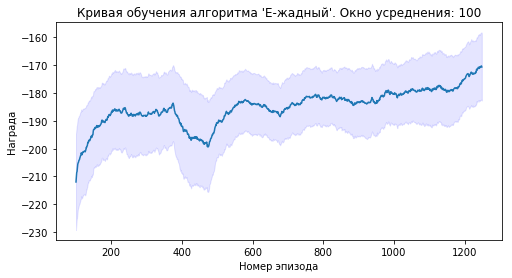

In [21]:
print plot_result(csvdict["greedy"], name = u"'Е-жадный'")
plt.savefig("egreedy_ll.png")

(-181.08771765031645, -191.77972439495733)


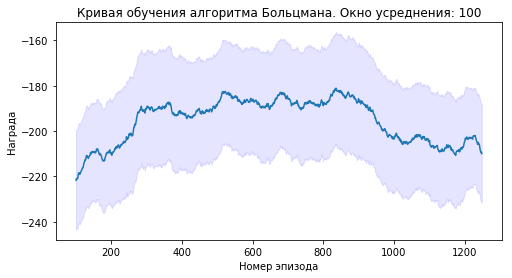

In [22]:
print plot_result(csvdict["boltzman"], name = u"Больцмана")
plt.savefig("boltzman_ll.png")

(-183.17414242829207, -190.27038479198376)


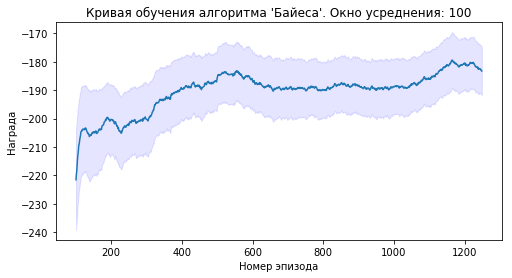

In [23]:
print plot_result(csvdict["bayes"], name = u"'Байеса'")
plt.savefig("bayes_ll.png")

(-104.72587976253354, -113.66770792350641)


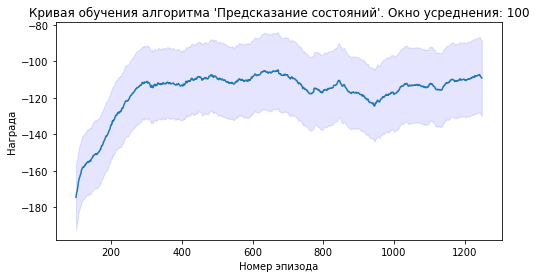

In [24]:
print plot_result(csvdict["inc"], name = u"'Предсказание состояний'")
plt.savefig("incentive_ll.png")

(-98.182095531938543, -126.07610700736242)


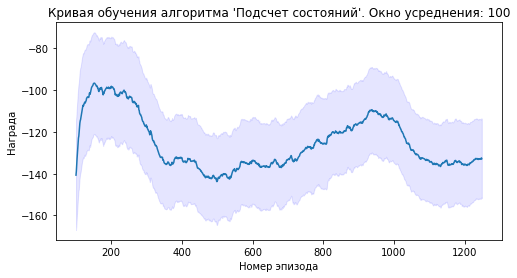

In [25]:
print plot_result(csvdict["count"], name = u"'Подсчет состояний'")
plt.savefig("count_ll.png")

(-176.69395474144719, -189.99553294512609)


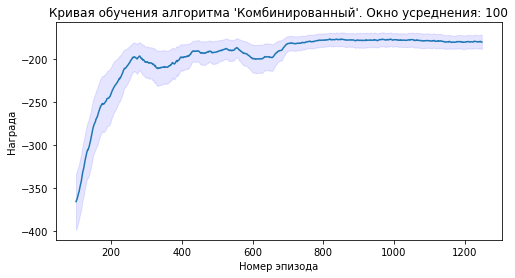

In [26]:
print plot_result(csvdict["comb"], name = u"'Комбинированный'")
plt.savefig("combined_ll.png")

In [18]:
def plot_all_results(csvdict, window = 100, ymin = 0):
    length = csvdict.values()[0].shape[1] - 1
    plt.figure(figsize = (12,6))
    index = np.arange(window, length)
#    plt.ylim(ymin = ymin, ymax = 250)
    for key in csvdict:
        s = csvdict[key].drop("Unnamed: 0", axis = 1)
        rol_mean = np.nan_to_num(s.mean(axis = 0).rolling(window = window).mean())[window:]
        plt.plot(index, rol_mean.copy(), label = key)
    plt.ylabel(u"Награда")
    plt.xlabel(u"Номер эпизода")
    plt.title(u"Кривые обучения алгоритмов. Окно усреднения: " + str(window))
    plt.legend()

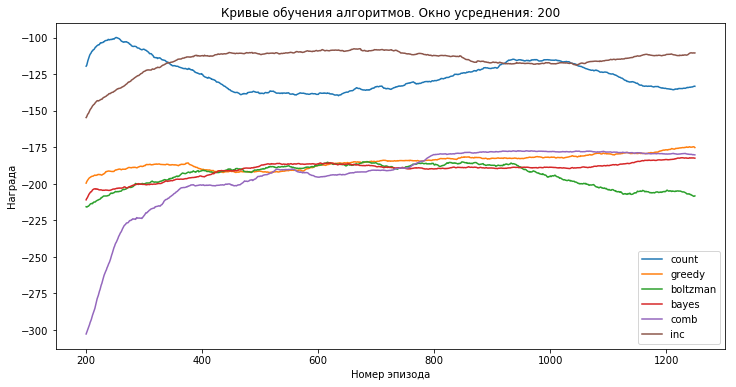

In [20]:
plot_all_results(csvdict, window = 200)
plt.savefig("allalgs_ll.png")